In [42]:
!pip install matplotlib
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


# Notebook for generating graphics

## Timeline of Events:

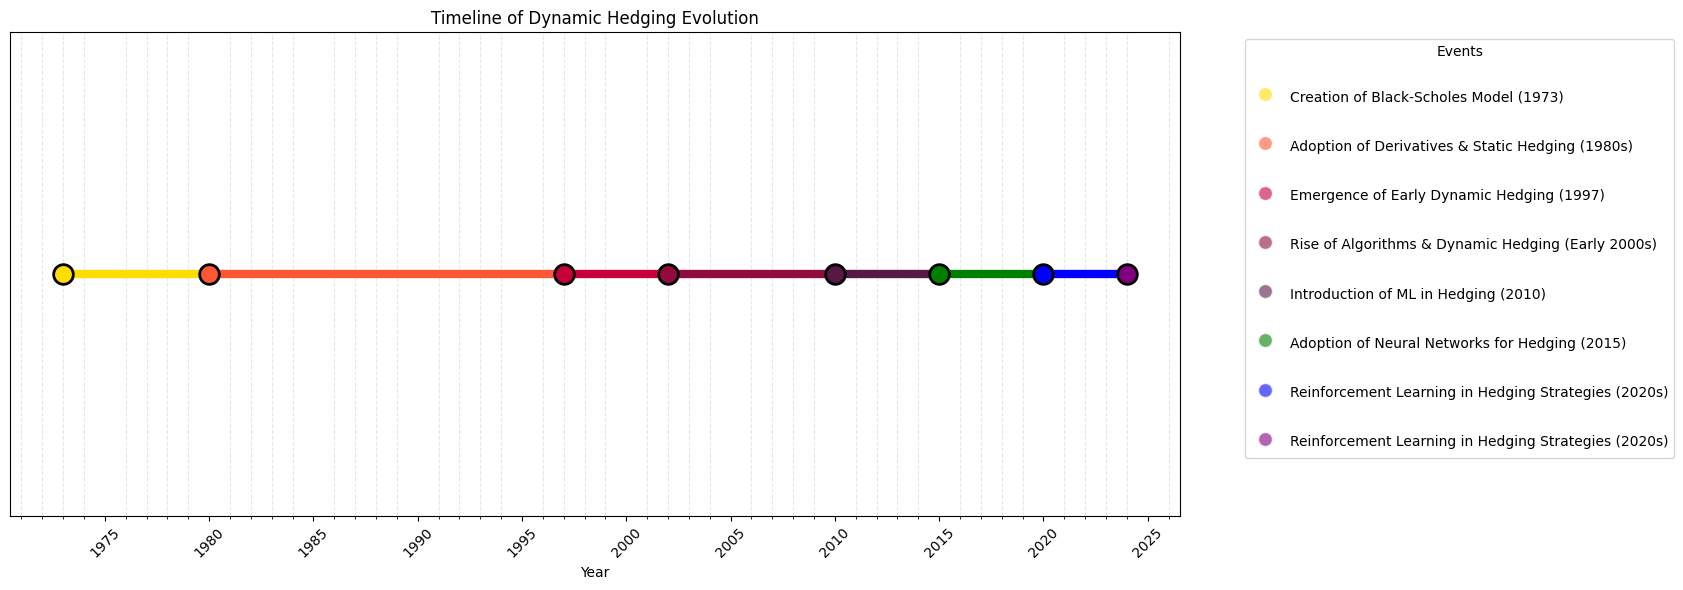

In [43]:
# Updated timeline data including events up to 2024
timeline_data = {
    'Event': [
        "Creation of Black-Scholes Model (1973)",
        "Adoption of Derivatives & Static Hedging (1980s)",
        "Emergence of Early Dynamic Hedging (1997)",
        "Rise of Algorithms & Dynamic Hedging (Early 2000s)",
        "Introduction of ML in Hedging (2010)",
        "Adoption of Neural Networks for Hedging (2015)",
        "Reinforcement Learning in Hedging Strategies (2020s)"
    ],
    'Date': [
        pd.to_datetime("1973-01-01"),
        pd.to_datetime("1980-01-01"),
        pd.to_datetime("1997-01-01"),
        pd.to_datetime("2002-01-01"),
        pd.to_datetime("2010-01-01"),
        pd.to_datetime("2015-01-01"),
        pd.to_datetime("2020-01-01")
    ]
}

# Extend timeline to 2024 with reinforcement learning as the latest topic
timeline_data['Date'].append(pd.to_datetime("2024-01-01"))
timeline_data['Event'].append("Reinforcement Learning in Hedging Strategies (2020s)")
timeline_df = pd.DataFrame(timeline_data)

# Create the timeline plot
fig, ax = plt.subplots(figsize=(12, 6))

# Ensure that the number of colors matches the number of events
colors = ['#FFDD00', '#FF5733', '#C70039', '#900C3F', '#581845', '#008000', '#0000FF', '#800080']

# Adding the colored markers on the timeline
for i, row in timeline_df.iterrows():
    ax.scatter([row['Date']], [1], color=colors[i], s=200, zorder=5, edgecolors="black", linewidth=2)

# Add colored lines connecting the points along the timeline
for i in range(len(timeline_df) - 1):
    ax.plot([timeline_df['Date'][i], timeline_df['Date'][i + 1]], 
            [1, 1], color=colors[i], lw=6, solid_capstyle='round')

# Formatting the plot
ax.set_yticks([])
ax.set_xlabel('Year')
ax.set_title('Timeline of Dynamic Hedging Evolution')

# Formatting x-axis to display years properly
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation=45)

# Adjust the layout for better presentation
plt.tight_layout()

# Legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', alpha=0.6, label=event, markerfacecolor=color, markersize=10)
    for event, color in zip(timeline_df['Event'], colors)
]

# Add legend with more white space between the labels and markers
plt.legend(handles=legend_handles, title='Events', loc='upper left', bbox_to_anchor=(1.05, 1), 
           handleheight=2, labelspacing=2)

plt.grid(alpha=0.3, which='both', linestyle='--')
plt.grid(axis='x', visible=False)

# Show the timeline plot
plt.show()



## Bubble Chart

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import LogLocator, FuncFormatter
from matplotlib.lines import Line2D


# Add jitter to the Year column
jitter = np.random.uniform(-0.2, 0.2, size=len(df))  # Adjust jitter range as needed
df['Year Jittered'] = df['Year'] + jitter
df['Citations Jittered'] = df['Citations'].apply(lambda x : x if x > 1 else np.random.uniform(0.9,1.1) if x == 1 else np.random.uniform(0.0, 0.02))

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Assign unique colors to each Model Type
model_types = df['Model Type'].unique()
colors = {model_type: plt.cm.tab10(i) for i, model_type in enumerate(model_types)}

# Plot each Model Type separately
for model_type in model_types:
    subset = df[df['Model Type'] == model_type]
    plt.scatter(
        subset['Year Jittered'],
        subset['Citations Jittered'],
        s=50*(1+np.emath.logn(2, 1+subset['Citations'])),  # Bubble size proportional to Citations
        label=model_type,
        alpha=0.5,
        c=[colors[model_type]],
        edgecolors='black',  # Add black outlines
        linewidth=0.6
    )

# Log scale for y-axis
plt.yscale('symlog', linthresh=0.1)

# Custom tick values for y-axis
y_ticks = [0,1,50, 200, 500]  # Specify your desired tick values
plt.gca().set_yticks(y_ticks)

# Custom tick formatting to show original units
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y)}"))

# Add labels and legend
plt.title('Bubble Chart of Papers by Year and Citations (Log-Scaled Y-Axis)')
plt.xlabel('Year')
plt.ylabel('Citations')
plt.xticks(range(df['Year'].min(), df['Year'].max() + 1))  # Show integer years on x-axis

legend_handles = [
    Line2D([0], [0], marker='o', color='w', alpha=0.6, label=model_type, markerfacecolor=colors[model_type], markersize=10)
    for model_type in model_types
]

# Add legend with constant bubble size
plt.legend(handles=legend_handles, title='Model Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.3, which='both', linestyle='--')
plt.grid(axis='x', visible=False)

# Show the plot
plt.show()